# PyTorch Computer Vision
* Reference notebook - https://www.learnpytorch.io/03_pytorch_computer_vision/

## 0. Computer vision libaries in PyTorch

* [`torchvision`](https://www.learnpytorch.io/03_pytorch_computer_vision/) - base domain library for PyTorch computer vision
* `torchvision.datasets` - get datasets and data loading functions for computer vision here
* `torchvision.models` - get pretrained computer vision models that you can leverage for your own problems
* `torchvision.transforms` - functions for manipulating your vision data (images) to be suitable for use with an ML model
* `torch.utils.data.Dataset` - Base dataset class for PyTorch.
* `torch.utils.data.DataLoader` - Creates a Python iterable over a dataset

In [1]:
import math
from pyexpat import model

# Import PyTorch
import torch
from functorch.dim import Tensor
from libmambapy.bindings.utils import TextRGBColor
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import v2

# Import torchmetrics
import torchmetrics

# Import matplotlib for visualization
import matplotlib.pyplot as plt

RANDOM_SEED = 42

# Check versions
print(torch.__version__)
print(torchvision.__version__)

2.5.1
0.20.1


## 1. Getting a dataset

The dataset we'll be using is FashionMNIST from torchvision.datasets - https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html#torchvision.datasets.FashionMNIST

In [2]:
# Define transforms (v2 API) without deprecated (`toTensor()`)
transform = v2.Compose([
    # v2.ToImage(),                               # ensures input is a tensor image
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),      # converts to float32 + scales [0,1]
    v2.Normalize((0.5,), (0.5,))                # normalize to [-1,1]
])
# Side note: Default = NCHW (channels-first) in torchvision

# Setup training data
train_data = datasets.FashionMNIST(
    root="./data", # where to download to
    train=True, # do we want the training dataset?
    download=True, # do we want to download it
    transform=transform, # do we want to transform the data?
    target_transform=None # dow do we want to transform labels/targets?
)
test_data = datasets.FashionMNIST(
    root="./data",
    train=False,
    download=True,
    transform=transform,
    target_transform=None
)

In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [82]:
# See the first training example
image, label = train_data[0]
image, label

(Image([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1

In [83]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [84]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [85]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [86]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

### 1.1 check teh input and output shapes of data

In [87]:
# Check teh shape of our image
print (f"Image shape: {image.shape} - [color_channels, height, width]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) - [color_channels, height, width]
Image label: Ankle boot


### 1.2 Visualizing our data

Image shape: torch.Size([1, 28, 28]) - [color_channels, height, width]


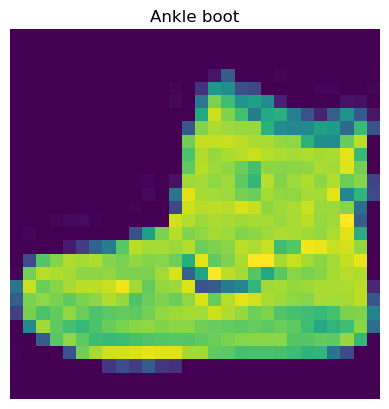

In [88]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape} - [color_channels, height, width]")
plt.imshow(image.squeeze())
plt.title(f"{class_names[label]}");
plt.axis(False);

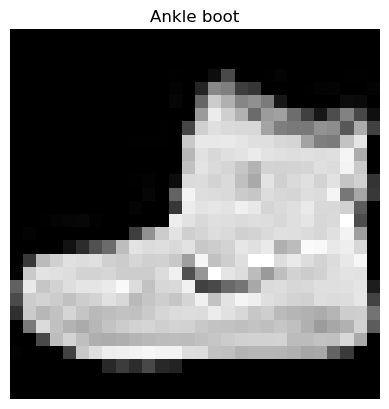

In [89]:
# In grayscale
plt.imshow(image.squeeze(), cmap="gray")
plt.title(f"{class_names[label]}");
plt.axis(False);

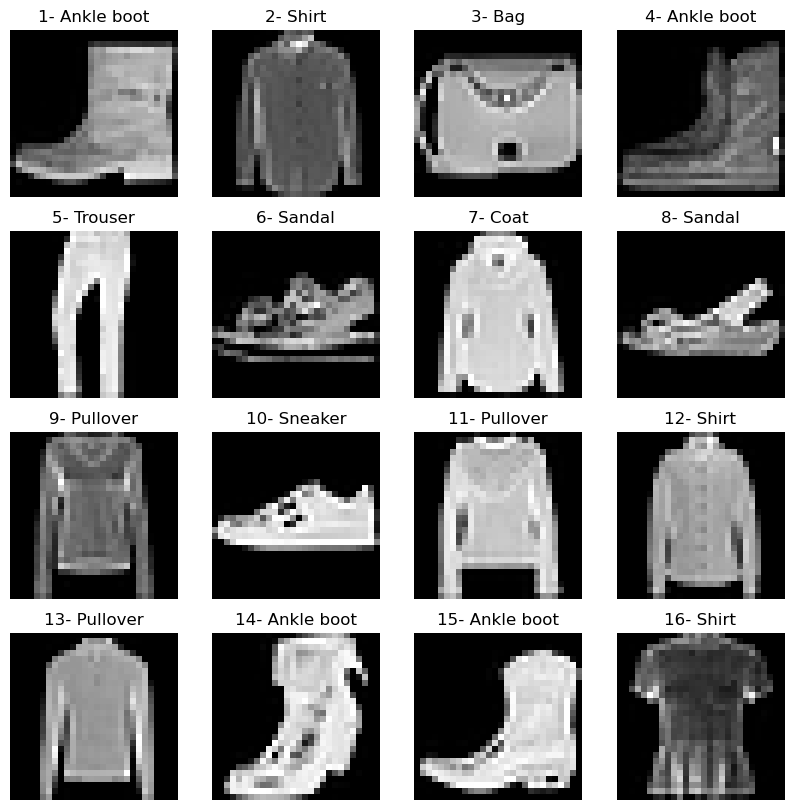

In [12]:
# Plot more images
torch.manual_seed(RANDOM_SEED)
fig = plt.figure(figsize=(10,10))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len (train_data), size=[1]).item ()
    image, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.title(f"{i}- {class_names[label]}")
    plt.axis(False);
    plt.imshow(image.squeeze(), cmap="gray")
fig;

In [91]:
# Since were here, let's functionize this for best practices...
from math import sqrt
def imshow(img, label=""):
    """
    This function shows the image and its label

    :param img: Image
    :param label: Label of the image as a title
    :return:
    """
    img = img.squeeze()
    plt.imshow(img, cmap="gray")
    plt.title(label if label is not None else f"{class_names[label]}")
    plt.axis(False);

def display_batch(features_batch, labels_batch):
    """
    This function displays the batch of images and their labels
    :param features_batch: the batch of images as a tensor
    :param labels_batch: the batch of labels as a tensor
    :return:
    """
    len_batch = len(features_batch)
    cols = 7
    rows = len_batch-cols
    fig = plt.figure(figsize=(10,rows*2))

    for i in range(1, len_batch):
        image, label = features_batch[i], labels_batch[i]
        fig.add_subplot(rows, cols, i)
        imshow(image, label=f"{i}- {class_names[label]}")
    fig.show();

Do you think these items of clothing (images) could be modelled with pure linear lines? Or do you think we'll need non-linearities?

In [14]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: ./data
     Split: Train
     StandardTransform
 Transform: Compose(
                  ToImage()
                  ToDtype(scale=True)
                  Normalize(mean=[0.5], std=[0.5], inplace=False)
            ),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: ./data
     Split: Test
     StandardTransform
 Transform: Compose(
                  ToImage()
                  ToDtype(scale=True)
                  Normalize(mean=[0.5], std=[0.5], inplace=False)
            ))

## 2. Prepare the DataLoader
Right now, our data is in the form of PyTorch Datasets.
DataLoader turns our dataset into a Python iterable.
More specifically, we want to turn our data into batches (or mini-batches)

Why would we do this?
1. It is more computationally efficient, as in, your computing hardware may not be able to look (store in memory) at 60000 images in one hit. Sowe break it down to 32 images at a time (batch size of 32) (the batch size can be changed).
> for more info on the batch size effect on the model this shows experiments in that field: [The effect of batch size on the generalizability of the convolutional neural networks on a histopathology dataset](https://www.sciencedirect.com/science/article/pii/S2405959519303455)

2. It gives our neural network more chances to update its gradients per epoch.
> [Are there any rules for choosing the size of a mini-batch?](https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch)

In [15]:
from torch.utils.data import DataLoader

# Set up the batch size
BATCH_SIZE = 64

train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x30621c7a0>,
 <torch.utils.data.dataloader.DataLoader at 0x30621ed20>)

In [16]:
# Let's check out what we've created
print(f"DataLoaders {train_dataloader}, {test_dataloader}")
print(f"DataLoaders {len(train_dataloader)}, {len(test_dataloader)}, batch_size={BATCH_SIZE}")

DataLoaders <torch.utils.data.dataloader.DataLoader object at 0x30621c7a0>, <torch.utils.data.dataloader.DataLoader object at 0x30621ed20>
DataLoaders 938, 157, batch_size=64


In [17]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([64, 1, 28, 28]), torch.Size([64]))

/var/folders/23/d0f0651j24d9y8lqrqd6k1dw0000gn/T/ipykernel_3300/2775965080.py:32: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show();


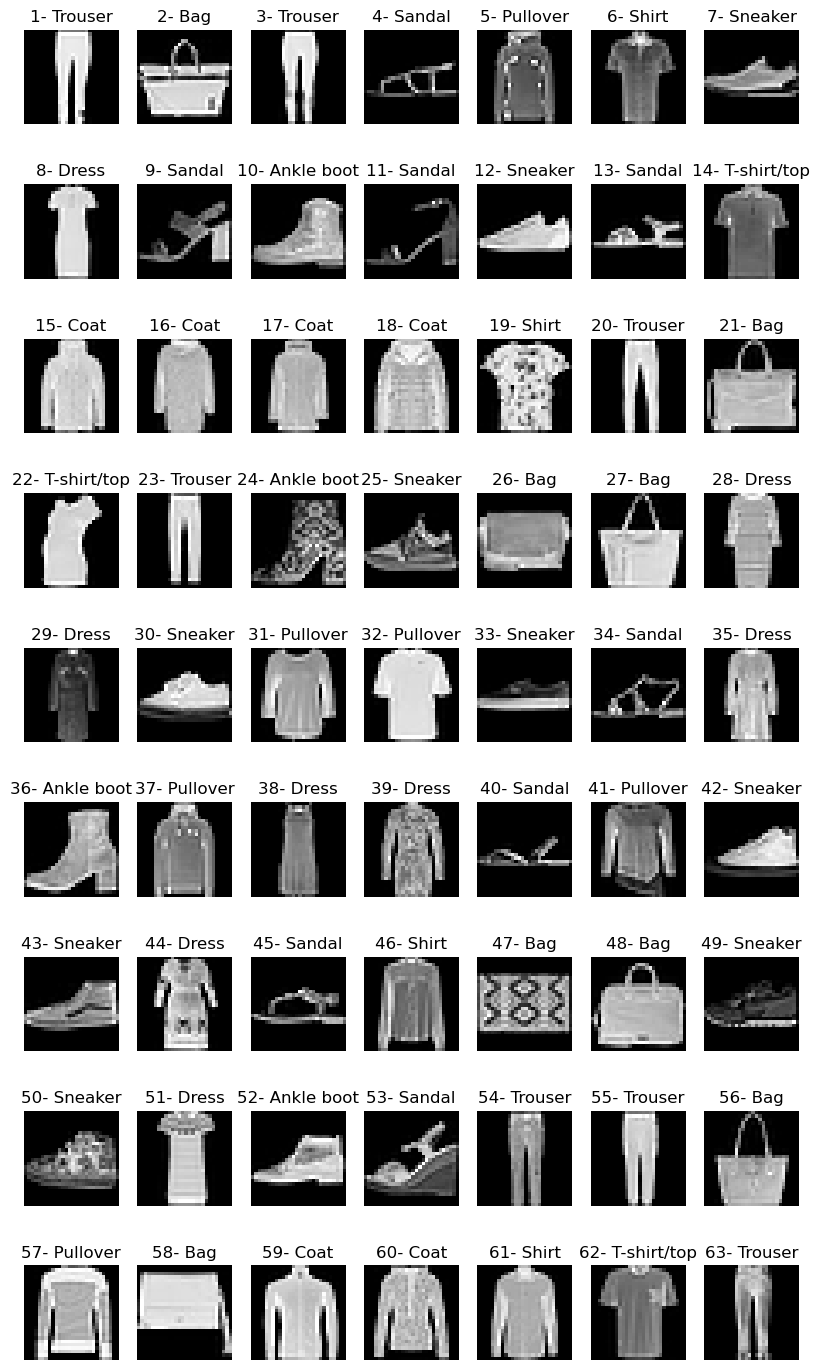

In [18]:
# Show a sample
torch.manual_seed(RANDOM_SEED)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
image, label = train_features_batch[random_idx], train_labels_batch[random_idx]
display_batch(train_features_batch, train_labels_batch) # Utilized the created functoin here

## 3. Model 0: Build a baseline model

When starting to build a series of machine learning modelling experiments, it's best practice to start with a baseline model.

A baseline model is a simple model you will try and improve upon with subsequent models/experiments.
In other words: start simply and add complexity when necessary (experimentation :))

In [19]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten teh sample
output = flatten_model(x)

# Print out what happened
print(f"Shape of before flattening: {x.shape}")
print(f"Shape of after flattening: {output.shape}")

Shape of before flattening: torch.Size([1, 28, 28])
Shape of after flattening: torch.Size([1, 784])


In [20]:
from torch import nn

device = torch.device("cuda" if torch.cuda.is_available() else ("mps" if torch.mps.is_available() else "cpu"))

class FashionMNISTModelV0(nn.Module):
    def __init__(self, in_features, hidden1, out_features):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # to change the input shape from (1, 28, 28) to (1, 786)
            nn.Linear(in_features, hidden1),
            # nn.ReLU(),
            # nn.Dropout(0.3),          # regularization (randomly drop neurons during training, rescale survivors, disable dropout at inference.) to prevent overfitting or high reliance on a neuron
            # nn.Linear(hidden1, hidden2),
            # nn.ReLU(),
            # nn.Dropout(0.3), # regularization
            nn.Linear(hidden1, out_features),
        )

    def forward(self, x):
        return self.layer_stack(x)

In [21]:
torch.manual_seed(RANDOM_SEED)
model_0 = FashionMNISTModelV0(
    in_features=28*28, # this is 28*28
    hidden1=256, # how mnay units in the hidden layer
    out_features=len(class_names), # one for every class
).to(device)

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=10, bias=True)
  )
)

In [22]:
# dummy_x = torch.rand([1, 1, 28, 28]).to(device)
# model_0(dummy_x)

In [23]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [ 0.0307,  0.0202,  0.0212,  ...,  0.0272,  0.0314,  0.0152],
                      [-0.0355,  0.0334, -0.0232,  ...,  0.0185, -0.0292, -0.0017],
                      [-0.0068, -0.0321,  0.0248,  ..., -0.0255, -0.0138, -0.0288]],
                     device='mps:0')),
             ('layer_stack.1.bias',
              tensor([ 0.0214, -0.0092,  0.0252,  0.0054, -0.0258, -0.0166, -0.0220, -0.0342,
                      -0.0085,  0.0256, -0.0313, -0.0035,  0.0126,  0.0164,  0.0323, -0.0243,
                       0.0015,  0.0066,  0.0342, -0.0187,  0.0285,  0.0317,  0.0150,  0.0209,
                      -0.0146,  0.0140,  0.0086,  0.0305, -0.0045,  0.002

### 3.1 Setup loss, optimizer and evaluation metrics

* Loss function - since we're working with multi-class data, our loss function will be `nn.CrossEntropyLoss()`
* Optimizer - our optimizer `torch.optim.SGD()` (stochastic gradient descent)
* Evaluation metric - since we're working on a classification problem, let's use accuracy as our evaluation metric

In [24]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.001)
acc_fn = torchmetrics.Accuracy(task="multiclass", num_classes=len(class_names))
# acc = acc_fn(y_pred, y_true)  # returns a tensor between 0 and 1

### 3.2 Creating a function to time our experiments
Machine learning is very experimental.

Two main things you'll often want to track are:
1. Model's performance (loss and accuracy values, etc.)
2. How fast it runs

In [25]:
from timeit import default_timer as timer
def print_train_time(start_time, end_time, device):
    time_elapsed = end_time - start_time
    print(f"Train time on device {device}: {time_elapsed}.")

In [26]:
start_time = timer()

end_time = timer()
print_train_time(start_time, end_time, device)

Train time on device mps: 4.708399990249745e-05.


In [27]:
# UPTOHERE: 3.3 Creating a training loop and training a model on batches of data...
# Highlight that the optimizer will update a model's parameters once per batch rather than once per epoch...

### 3.3 Creating a training loop and a model on batches of data

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss *per batch*.
3. Loop through testing batches, perform testing steps, calculate the test loss per batch.
4. Print out what's happening.
5. Time it all.

In [28]:
# Device-agnostic code
available_devices = list(filter(
    lambda device: device[1],
    [
        ("cuda", torch.cuda.is_available()),
        ("mps", torch.backends.mps.is_available()),
        ("cpu", True)
    ]
))
available_devices = list(map(lambda d: torch.device(d[0]), available_devices))

device = available_devices[0]
available_devices, device

([device(type='mps'), device(type='cpu')], device(type='mps'))

In [29]:
# Import tqdm for a progress bar
# def training_loop(device):
from tqdm.auto import tqdm
# Set the seed and start the timer

torch.manual_seed(RANDOM_SEED)
train_time_start_on_cpu = timer()

def training_loop(model, device, EPOCHS=3):
    # Device-agnostic code
    model.to(device)

    # Set the number of epochs (we'll keep this small for faster training time)
    # EPOCHS = 100

    # Create training and testing loop
    for epoch in tqdm(range(EPOCHS), desc="Training epochs"):
        print(f"Epoch {epoch + 1}/{EPOCHS}")
        ### Training
        train_loss = 0
        # Add a loop to loop through the training batches
        for batch_idx, (data, target) in enumerate(train_dataloader):
            data, target = data.to(device), target.to(device)
            model.train()
            # 1. Forward pass
            y_pred = model(data)

            # 2. Calculate the loss (per batch)
            loss = loss_fn(y_pred, target)
            train_loss += loss.item()

            # 3. Optimizer zero grad
            optimizer.zero_grad()

            # 4. Loss backward
            loss.backward()

            # 5. Optimizer step
            optimizer.step()

            # Print out what's happening
            if batch_idx % 500 == 0:
                print(f"""Batch {batch_idx + 1}/{len(train_dataloader)}.
    {batch_idx*len(data)}/{len(train_dataloader.dataset)} Images processed""")
        # Divide total loss by length of train dataloader
        train_loss /= len(train_dataloader)

        ### Testing
        test_loss, test_acc = 0, 0
        model.eval()
        with torch.inference_mode():
            for X_test, y_test in test_dataloader:
                X_test, y_test = X_test.to(device), y_test.to(device)
                # 1. Forward pass
                test_pred = model(X_test)

                # 2. Calculate the test loss (accumulatively)
                test_loss += loss_fn(test_pred, y_test).item()

                #  3. Calculate the accuracy
                test_acc += acc_fn.to(device)(test_pred, y_test).item()
            # Calculate the test loss average per batch
            test_loss /= len(test_dataloader)

            # Calculate the test accuracy average per batch
            test_acc /= len(test_dataloader)
        # Print out what's happening
        print(f'Train loss: {train_loss:4f}, test loss: {test_loss:.4f}, test accuracy: {test_acc:.4f}')

    # Calculate the training time
    end_time = timer()
    print_train_time(start_time, end_time, str(next(model.parameters()).device))
    return model

In [30]:
model_0 = training_loop(model_0, available_devices[0])

Training epochs:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1/3
Batch 1/938.
    0/60000 Images processed
Batch 501/938.
    32000/60000 Images processed
Train loss: 1.404351, test loss: 1.0076, test accuracy: 0.7095
Epoch 2/3
Batch 1/938.
    0/60000 Images processed
Batch 501/938.
    32000/60000 Images processed
Train loss: 0.876130, test loss: 0.8044, test accuracy: 0.7392
Epoch 3/3
Batch 1/938.
    0/60000 Images processed
Batch 501/938.
    32000/60000 Images processed
Train loss: 0.746330, test loss: 0.7231, test accuracy: 0.7538
Train time on device mps:0: 74.37015929199993.


In [31]:
training_loop(model_0, available_devices[1])

Training epochs:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1/3
Batch 1/938.
    0/60000 Images processed
Batch 501/938.
    32000/60000 Images processed
Train loss: 0.683999, test loss: 0.6773, test accuracy: 0.7657
Epoch 2/3
Batch 1/938.
    0/60000 Images processed
Batch 501/938.
    32000/60000 Images processed
Train loss: 0.644583, test loss: 0.6458, test accuracy: 0.7734
Epoch 3/3
Batch 1/938.
    0/60000 Images processed
Batch 501/938.
    32000/60000 Images processed
Train loss: 0.616352, test loss: 0.6222, test accuracy: 0.7827
Train time on device cpu: 129.87938566699995.


FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=10, bias=True)
  )
)

## 4. Make predictions and get Model 0 results

In [32]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               acc_fn: torch.nn.Module,
               device = device):
    loss, acc = 0, 0
    model.eval()
    model.to(device)
    loss_fn.to(device)
    acc_fn.to(device)
    with torch.inference_mode():
        for X_test, y_test in data_loader:
            X_test, y_test = X_test.to(device), y_test.to(device)
            test_pred = model(X_test)
            loss += loss_fn(test_pred, y_test).item()
            acc += acc_fn.to(device)(test_pred, y_test).item()

        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {
        "model_name": model.__class__.__name__,
        "model": model,
        "loss": loss,
        "accuracy": acc
    }
model_0_results = eval_model(model_0,
                             test_dataloader,
                             loss_fn,
                             acc_fn,
                             str(next(model_0.parameters()).device))

In [33]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model': FashionMNISTModelV0(
   (layer_stack): Sequential(
     (0): Flatten(start_dim=1, end_dim=-1)
     (1): Linear(in_features=784, out_features=256, bias=True)
     (2): Linear(in_features=256, out_features=10, bias=True)
   )
 ),
 'loss': 0.6222410380460655,
 'accuracy': 0.7827428343949044}

## 5. System device agnostic-code (for using a GPU if there is one)

In [34]:
# Already done but

In [35]:
# torch.cuda.is_available()
torch.mps.is_available()

True

In [36]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else ("mps" if torch.mps.is_available() else "cpu"))
device

device(type='mps')

## Trying to bulid a model with non-linearity

In [37]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self, in_features, hidden1, hidden2,  out_features):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Conv2d(in_channels=1, # the colour channels
                      out_channels=hidden1, # output filter channels
                      kernel_size=3,
                      padding=1),
        )

    def forward(self, x):
        return self.layer_stack(x)

### Understanding `nn.Conv2d`

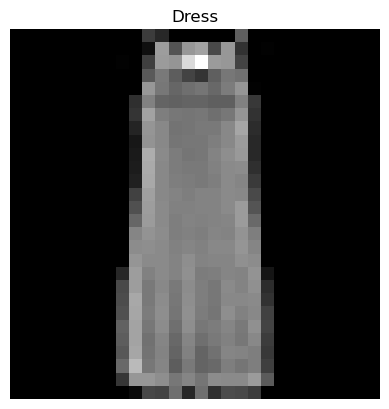

In [38]:
plt.axis(False);
# In grayscale
plt.imshow(image.squeeze(), cmap="gray")
plt.title(f"{class_names[label]}");
plt.axis(False);

In [39]:
image.shape

torch.Size([1, 28, 28])

In [40]:
testy = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, padding=1, bias=0)(image)
testy.shape

torch.Size([1, 28, 28])

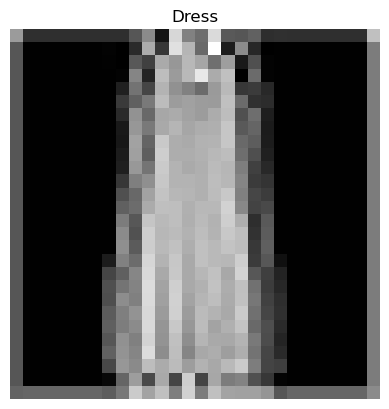

In [41]:
# In grayscale
plt.imshow(testy.detach().numpy().squeeze(), cmap="gray")
plt.title(f"{class_names[label]}")
plt.axis(False);

Output shape: torch.Size([1, 4, 28, 28])


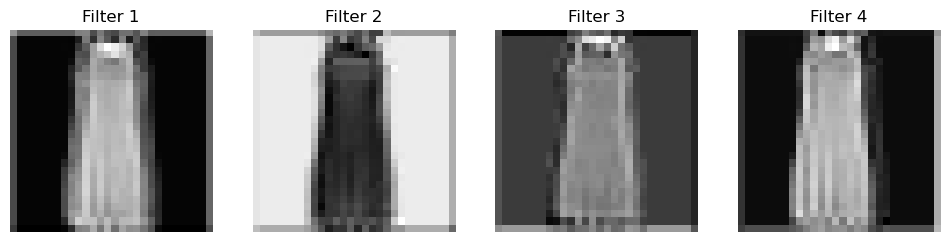

In [42]:
# Input: (1, 28, 28) -> add batch dim: (1, 1, 28, 28)
x = image.unsqueeze(0)

# Conv layer: 1 input channel, 4 output channels (so 4 filters)
conv = nn.Conv2d(in_channels=1, out_channels=4, kernel_size=3, padding=1, bias=False)

# Forward pass
y = conv(x)  # (1, 4, 28, 28)

print("Output shape:", y.shape)

# Plot the 4 feature maps
fig, axes = plt.subplots(1, 4, figsize=(12, 3))
for i in range(4):
    axes[i].imshow(y[0, i].detach().numpy(), cmap="gray")
    axes[i].set_title(f"Filter {i+1}")
    axes[i].axis("off")
plt.show()

In [43]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self, in_features, hidden1, hidden2, out_features):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Conv2d(in_channels=1,  # the colour channels
                      out_channels=hidden1,  # output filter channels
                      kernel_size=3,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),   # 28x28 -> 14x14

            nn.Conv2d(in_channels=hidden1, out_channels=hidden2, kernel_size=3,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),   # 14x14 -> 7x7

            nn.Flatten(),
            nn.Linear(hidden2 * 7 * 7, 128),
            nn.ReLU(),
            nn.Linear(128, out_features)   # 10 classes

        )

    def forward(self, x):
        return self.layer_stack(x)

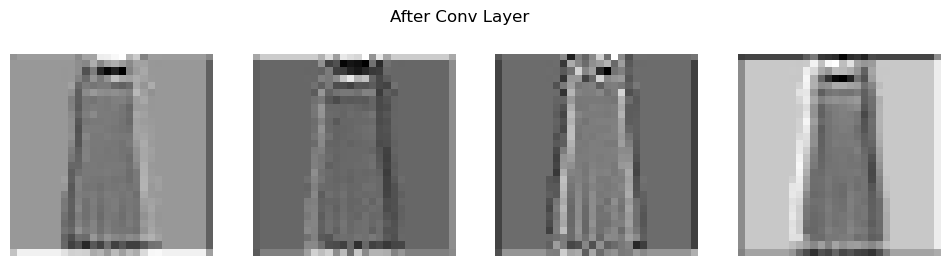

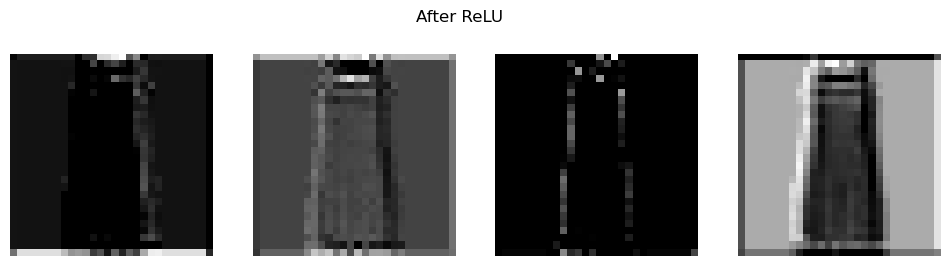

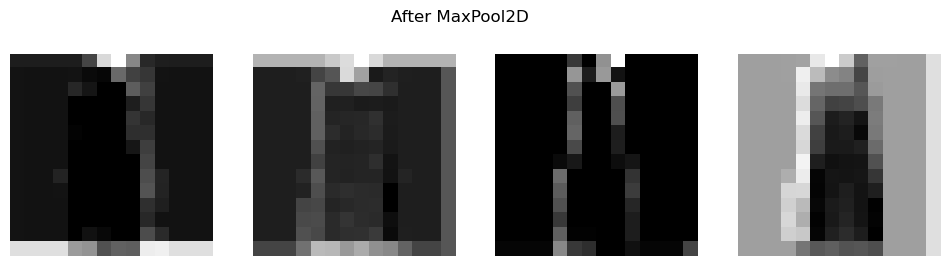

In [44]:
# CNN pass visualization

# Suppose 'image' is your FashionMNIST single image tensor: (1, 28, 28)
x = image.unsqueeze(0)  # add batch dim: (1, 1, 28, 28)

# Define the CNN layers step by step (like in your model)
conv1 = nn.Conv2d(1, 4, kernel_size=3, padding=1)  # 4 filters for visualization
relu = nn.ReLU()
pool = nn.MaxPool2d(2)

# 1 Conv layer
conv_out = conv1(x)

# 2 ReLU
relu_out = relu(conv_out)

# 3 MaxPool
pool_out = pool(relu_out)

# Function to plot feature maps
def plot_feature_maps(tensor, title):
    num_filters = tensor.shape[1]
    fig, axes = plt.subplots(1, num_filters, figsize=(3*num_filters, 3))
    for i in range(num_filters):
        axes[i].imshow(tensor[0, i].detach().numpy(), cmap='gray')
        axes[i].axis('off')
    plt.suptitle(title)
    plt.show()

# Visualize
plot_feature_maps(conv_out, "After Conv Layer")
plot_feature_maps(relu_out, "After ReLU")
plot_feature_maps(pool_out, "After MaxPool2D")


In [45]:
def visualize_cnn_pass(model, x):
    """
    Visualize feature maps at each Conv / ReLU / Pool layer
    model: nn.Sequential or any nn.Module with layers
    x: input image tensor (1, 1, H, W)
    """
    out = x.unsqueeze(0)  # add batch dimension
    for name, layer in model.named_children():
        out = layer(out)
        if (isinstance(layer, nn.Conv2d) or isinstance(layer, nn.ReLU) or isinstance(layer, nn.MaxPool2d)) and out.dim() == 4:
            num_filters = out.shape[1]
            fig, axes = plt.subplots(1, min(num_filters, 6), figsize=(3*min(num_filters,6), 3))
            for i in range(min(num_filters, 6)):
                axes[i].imshow(out[0, i].detach().numpy(), cmap='gray')
                axes[i].axis('off')
            plt.suptitle(f"{name} ({layer.__class__.__name__})")
            plt.show()
        else:
            print(f"{name}: {layer.__class__.__name__}, output shape: {out.shape}")
            print(out)

In [46]:
testy_model = FashionMNISTModelV1(image.shape[1], 5, 5, 10)

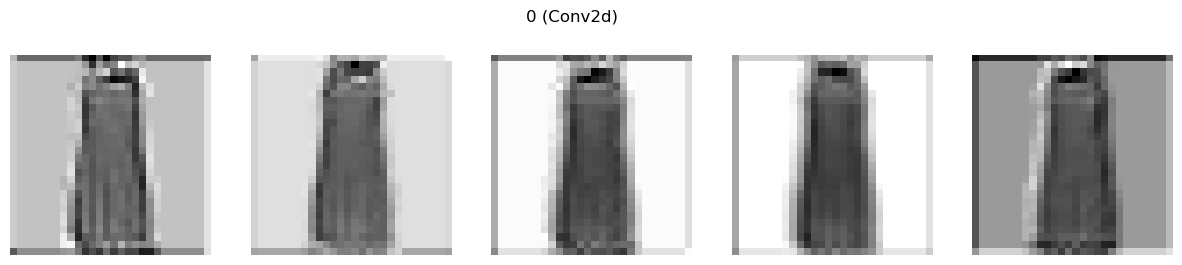

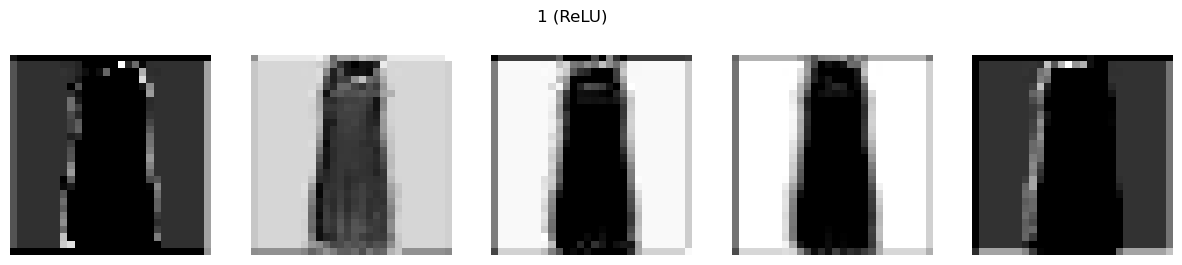

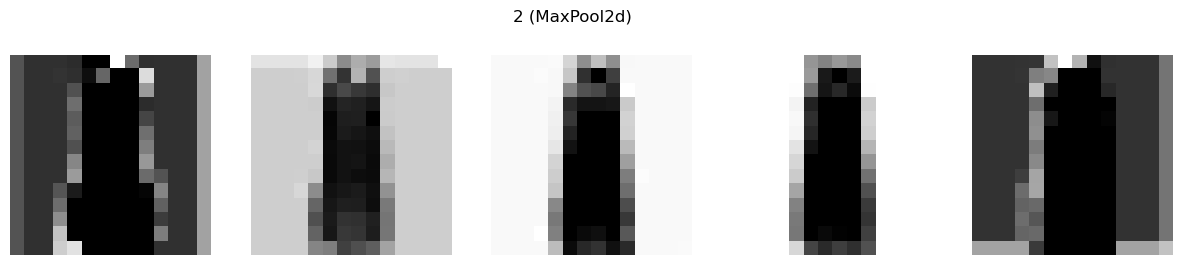

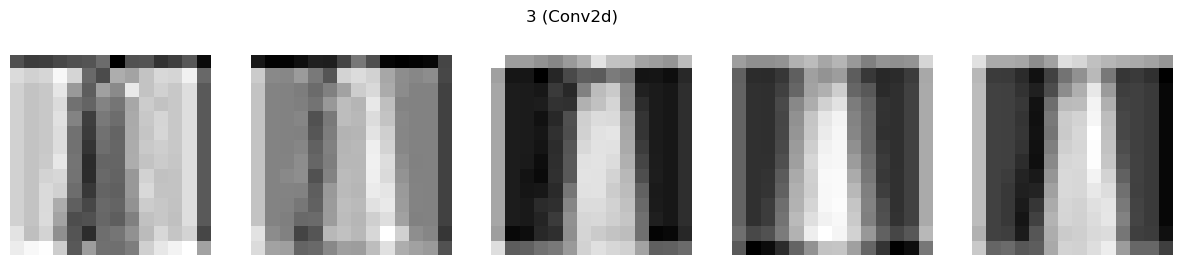

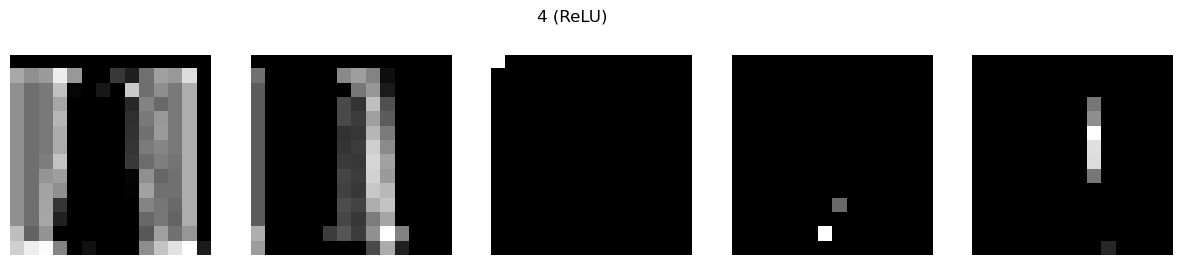

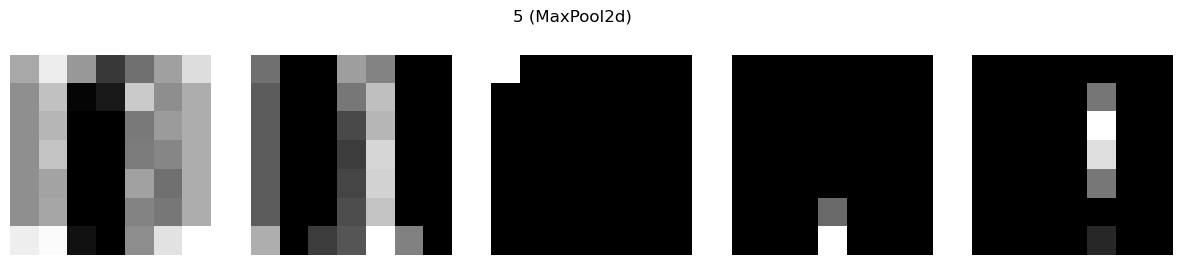

6: Flatten, output shape: torch.Size([1, 245])
tensor([[0.1304, 0.1838, 0.1182, 0.0438, 0.0871, 0.1246, 0.1717, 0.1113, 0.1496,
         0.0045, 0.0188, 0.1567, 0.1106, 0.1345, 0.1113, 0.1417, 0.0000, 0.0000,
         0.0946, 0.1206, 0.1345, 0.1113, 0.1525, 0.0000, 0.0000, 0.0961, 0.1045,
         0.1345, 0.1113, 0.1274, 0.0000, 0.0000, 0.1253, 0.0872, 0.1345, 0.1113,
         0.1292, 0.0000, 0.0000, 0.1017, 0.0925, 0.1345, 0.1847, 0.1953, 0.0137,
         0.0000, 0.1095, 0.1758, 0.1984, 0.0935, 0.0000, 0.0000, 0.1318, 0.1108,
         0.0000, 0.0000, 0.0769, 0.0000, 0.0000, 0.0993, 0.1598, 0.0000, 0.0000,
         0.0769, 0.0000, 0.0000, 0.0616, 0.1518, 0.0000, 0.0000, 0.0769, 0.0000,
         0.0000, 0.0511, 0.1791, 0.0000, 0.0000, 0.0769, 0.0000, 0.0000, 0.0575,
         0.1757, 0.0000, 0.0000, 0.0769, 0.0000, 0.0000, 0.0650, 0.1629, 0.0000,
         0.0000, 0.1459, 0.0000, 0.0511, 0.0710, 0.2135, 0.1078, 0.0000, 0.0399,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.000

In [47]:
visualize_cnn_pass(testy_model.layer_stack, image)

## Trying out `FashionMNISTModelV1`

In [48]:
model_1 = FashionMNISTModelV1(in_features=28, hidden1=32, hidden2=64, out_features=len(class_names))

In [49]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_1.parameters(), lr=0.001)
acc_fn = torchmetrics.Accuracy(task="multiclass", num_classes=len(class_names))

In [115]:
training_loop(model=model_1,
              device=device,
              EPOCHS=20)

Training epochs:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 1/20
Batch 1/938.
    0/60000 Images processed
Batch 501/938.
    32000/60000 Images processed
Train loss: 0.075493, test loss: 0.2878, test accuracy: 0.9190
Epoch 2/20
Batch 1/938.
    0/60000 Images processed
Batch 501/938.
    32000/60000 Images processed
Train loss: 0.075505, test loss: 0.2878, test accuracy: 0.9190
Epoch 3/20
Batch 1/938.
    0/60000 Images processed
Batch 501/938.
    32000/60000 Images processed
Train loss: 0.075437, test loss: 0.2878, test accuracy: 0.9190
Epoch 4/20
Batch 1/938.
    0/60000 Images processed
Batch 501/938.
    32000/60000 Images processed
Train loss: 0.075476, test loss: 0.2878, test accuracy: 0.9190
Epoch 5/20
Batch 1/938.
    0/60000 Images processed
Batch 501/938.
    32000/60000 Images processed
Train loss: 0.075500, test loss: 0.2878, test accuracy: 0.9190
Epoch 6/20
Batch 1/938.
    0/60000 Images processed
Batch 501/938.
    32000/60000 Images processed
Train loss: 0.075532, test loss: 0.2878, test accuracy: 0.9190
Epoch 7/20
Batch

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=3136, out_features=128, bias=True)
    (8): ReLU()
    (9): Linear(in_features=128, out_features=10, bias=True)
  )
)

In [116]:
model_1_results = eval_model(model_1,
                             test_dataloader,
                             loss_fn,
                             acc_fn,
                             str(next(model_1.parameters()).device))
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model': FashionMNISTModelV1(
   (layer_stack): Sequential(
     (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (1): ReLU()
     (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
     (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (4): ReLU()
     (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
     (6): Flatten(start_dim=1, end_dim=-1)
     (7): Linear(in_features=3136, out_features=128, bias=True)
     (8): ReLU()
     (9): Linear(in_features=128, out_features=10, bias=True)
   )
 ),
 'loss': 0.28775882630781,
 'accuracy': 0.9189888535031847}

(Back to the course)
## 6. Model 1: Building a better model with non-linearity
We learned the power of non-linearity in notebook 02

In [52]:
# Create a model with non-linear and linear layers
class FashionMNISTModelV2(nn.Module):
    def __init__(self, in_features, hidden1, hidden2, out_features):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=in_features, out_features=hidden1),
            nn.ReLU(),
            nn.Linear(in_features=hidden1, out_features=hidden2),
            nn.ReLU(),
            nn.Linear(in_features=hidden2, out_features=out_features),
            nn.ReLU()
        )
    def forward(self, x):
        return self.layer_stack(x)

In [53]:
# Creating an instance of model_2
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(in_features=28*28,
                              hidden1=64,
                              hidden2=32,
                              out_features=len(class_names)
                              ).to(device)
model_2

FashionMNISTModelV2(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=64, bias=True)
    (2): ReLU()
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): ReLU()
    (5): Linear(in_features=32, out_features=10, bias=True)
    (6): ReLU()
  )
)

### 6.1 Setup loss, optimizer and evaluation metrics

In [54]:
loss_fn = nn.CrossEntropyLoss() # measure how wrong the model is
optimizer = torch.optim.Adam(model_2.parameters(), lr=0.001) # tries to update our model's parameters to reduce the loss
acc_fn = torchmetrics.Accuracy(task="multiclass", num_classes=len(class_names))

### 6.2 Functionizing training and evaluation/testing loops

Let's create a function for:
* training loop - `train_step()`
* testing loop - `test_step()`

In [55]:
# Import tqdm for a progress bar
from tqdm.auto import tqdm
def training_step(model: torch.nn.Module,
                  dataloader: torch.utils.data.DataLoader,
                  loss_fn: torch.nn.Module,
                  optimizer: torch.optim.Optimizer,
                  acc_fn: torch.nn.Module,
                  device: torch.device = device):
    """
    Performs a training with a model trying to learn on `dataloader`

    :param model: The model to train
    :param dataloader: The dataloader to train on
    :param loss_fn: The loss function
    :param optimizer: The optimizer
    :param acc_fn: The accuracy function
    :param device: The device to train on
    :return: The trained model
    """

    train_loss, train_accuracy = 0, 0
    # Device-agnostic code
    model.to(device)
    acc_fn.to(device)
    loss_fn.to(device)

    # Put model into training mode
    model.train()

    # Add a loop to loop through the training batches
    for batch_idx, (data, target) in enumerate(dataloader):

        # Put data on target device
        data, target = data.to(device), target.to(device)

        # 1. Forward pass
        y_pred = model(data)

        # 2. Calculate the loss (per batch)
        loss = loss_fn(y_pred, target)
        train_loss += loss.item()
        train_accuracy += acc_fn(y_pred, target)

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Divide total loss by length of train dataloader
    train_loss /= len(dataloader)
    train_accuracy /= len(dataloader)

    # Print out what's happening
    print(f"Train loss: {train_loss:5f}, Train accuracy: {train_accuracy*100:.2f}%")

    return model

In [56]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              acc_fn: torch.nn.Module,
              device: torch.device = device):
    """
    Performs a testing with a model trying to learn on `dataloader`
    :param model: The model to test
    :param dataloader: The dataloader to test on
    :param loss_fn: The loss function
    :param acc_fn: The accuracy function
    :param device: The device to train on
    :return: The trained model
    """
    acc_fn.to(device)
    model.to(device)

    ### Testing
    test_loss, test_accuracy = 0, 0
    loss_fn.to(device)
    acc_fn.to(device)

    model.eval()
    with torch.inference_mode():
        for X_test, y_test in dataloader:
            X_test, y_test = X_test.to(device), y_test.to(device)
            # 1. Forward pass
            test_pred = model(X_test)

            # 2. Calculate the test loss (accumulatively)
            test_loss += loss_fn(test_pred, y_test).item()

            #  3. Calculate the accuracy
            test_accuracy += acc_fn.to(device)(test_pred, y_test).item()
        # Calculate the test loss average per batch
        test_loss /= len(dataloader)

        # Calculate the test accuracy average per batch
        test_accuracy /= len(dataloader)
    # Print out what's happening
    print(f'Test loss: {test_loss:.4f}, test accuracy: {test_accuracy*100:.2f}%')
    return model

In [117]:
model_2 = FashionMNISTModelV2(in_features=28*28,
                              hidden1=64,
                              hidden2=32,
                              out_features=len(class_names)
                              ).to(device)
loss_fn = nn.CrossEntropyLoss() # measure how wrong the model is
optimizer = torch.optim.Adam(model_2.parameters(), lr=0.001) # tries to update our model's parameters to reduce the loss
acc_fn = torchmetrics.Accuracy(task="multiclass", num_classes=len(class_names))
model_2, device

(FashionMNISTModelV2(
   (layer_stack): Sequential(
     (0): Flatten(start_dim=1, end_dim=-1)
     (1): Linear(in_features=784, out_features=64, bias=True)
     (2): ReLU()
     (3): Linear(in_features=64, out_features=32, bias=True)
     (4): ReLU()
     (5): Linear(in_features=32, out_features=10, bias=True)
     (6): ReLU()
   )
 ),
 device(type='mps'))

In [118]:
torch.manual_seed(RANDOM_SEED)
train_time_start = timer()

# Set the number of epochs (we'll keep this small for faster training time)
EPOCHS = 20

# Create training and testing loop
for epoch in tqdm(range(EPOCHS), desc="Training epochs"):
    print(f"Epoch {epoch + 1}/{EPOCHS}")
    training_step(model=model_2,
                  dataloader=train_dataloader,
                  loss_fn=loss_fn,
                  optimizer=optimizer,
                  acc_fn=acc_fn,
                  device=device)
    test_step(model=model_2,
              dataloader=test_dataloader,
              loss_fn=loss_fn,
              acc_fn=acc_fn,
              device=device)
# Calculate the training time
end_time = timer()
print_train_time(start_time, end_time, str(next(model_2.parameters()).device))


Training epochs:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 1/20
Train loss: 0.768021, Train accuracy: 72.73%
Test loss: 0.6868, test accuracy: 74.64%
Epoch 2/20
Train loss: 0.626964, Train accuracy: 76.74%
Test loss: 0.6639, test accuracy: 74.88%
Epoch 3/20
Train loss: 0.593661, Train accuracy: 77.63%
Test loss: 0.6358, test accuracy: 75.94%
Epoch 4/20
Train loss: 0.569064, Train accuracy: 78.40%
Test loss: 0.5962, test accuracy: 77.93%
Epoch 5/20
Train loss: 0.552621, Train accuracy: 78.91%
Test loss: 0.5971, test accuracy: 77.69%
Epoch 6/20
Train loss: 0.537202, Train accuracy: 79.34%
Test loss: 0.5943, test accuracy: 77.38%
Epoch 7/20
Train loss: 0.526165, Train accuracy: 79.65%
Test loss: 0.5809, test accuracy: 77.90%
Epoch 8/20
Train loss: 0.515324, Train accuracy: 80.16%
Test loss: 0.5900, test accuracy: 77.95%
Epoch 9/20
Train loss: 0.505998, Train accuracy: 80.32%
Test loss: 0.5964, test accuracy: 77.83%
Epoch 10/20
Train loss: 0.496892, Train accuracy: 80.68%
Test loss: 0.5906, test accuracy: 77.89%
Epoch 11/20
Train loss: 0.490

> **Note:** Sometimes, depending on your data/hardware you might find that your nodel trains faster on CPU than GPU.
>
> Why is this?
>
> 1. It could be that the overhead for copying data/model to and from the GPU outweighs the compute benefits offered by the GPU.
> 2. The hardware you're using has a better CPU in terms compute capability than the GPU.
>
> For more on how to make your models compute faster, see here: https://horace.io/brrr_intro.html

In [119]:
model_2_results = eval_model(
    model_2,
    test_dataloader,
    loss_fn,
    acc_fn,
    str(next(model_2.parameters()).device)
)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model': FashionMNISTModelV2(
   (layer_stack): Sequential(
     (0): Flatten(start_dim=1, end_dim=-1)
     (1): Linear(in_features=784, out_features=64, bias=True)
     (2): ReLU()
     (3): Linear(in_features=64, out_features=32, bias=True)
     (4): ReLU()
     (5): Linear(in_features=32, out_features=10, bias=True)
     (6): ReLU()
   )
 ),
 'loss': 0.5923054770679231,
 'accuracy': 0.7860270700636943}

## 7. Model 2/3: Building a Convolutional Neural Network (CNN)

CNN's are also known ConvNets.

CNN's are known for their capabilities to find patterns in visual data.

To find out what's happening inside a CNN, see this website: https://poloclub.github.io/cnn-explainer/

In [108]:
# Create a convolutional neural network
class FashionMNISTModelV3(nn.Module):
    """
    Model architecture tht replicates the TinyVGG model from CNN explainer website
    """
    def __init__(self, in_features, hidden_units, out_features):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=in_features,  # the colour channels
                      out_channels=hidden_units,  # output filter channels
                      kernel_size=3,
                      stride=1,
                      padding=1), # values we can set ourselves in our NN's are called hyperparameters
            nn.ReLU(),

            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,  # the colour channels
                      out_channels=hidden_units,  # output filter channels
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(hidden_units * 7 * 7, out_features)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        return self.classifier(x)

In [109]:
model_3 = FashionMNISTModelV3(in_features=1,
                              hidden_units=64,
                              out_features=len(class_names)
                              ).to(device)
loss_fn = nn.CrossEntropyLoss() # measure how wrong the model is
optimizer = torch.optim.Adam(model_3.parameters(), lr=0.001) # tries to update our model's parameters to reduce the loss
acc_fn = torchmetrics.Accuracy(task="multiclass", num_classes=len(class_names))
model_3, device

(FashionMNISTModelV3(
   (conv_block_1): Sequential(
     (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (1): ReLU()
     (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (3): ReLU()
     (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   )
   (conv_block_2): Sequential(
     (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (1): ReLU()
     (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (3): ReLU()
     (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (5): ReLU()
     (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   )
   (classifier): Sequential(
     (0): Flatten(start_dim=1, end_dim=-1)
     (1): Linear(in_features=3136, out_features=10, bias=True)
   )
 ),
 device(type='mps'))

In [100]:
training_step(
    model=model_3,
    dataloader=train_dataloader,
    loss_fn=loss_fn,
    optimizer=optimizer,
    acc_fn=acc_fn,
    device=device
)

Train loss: 0.264053, Train accuracy: 90.54%


FashionMNISTModelV3(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3136, out_features=10, bias=True)
  )
)

In [63]:
test_step(
    model=model_3,
    dataloader=test_dataloader,
    loss_fn=loss_fn,
    acc_fn=acc_fn,
)

Test loss: 0.3124, test accuracy: 88.76%


FashionMNISTModelV3(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3136, out_features=10, bias=True)
  )
)

In [66]:
model_3.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[-0.0963, -0.0055, -0.1008],
                        [ 0.2720, -0.2426, -0.1266],
                        [-0.0485, -0.1661,  0.0736]]],
              
              
                      [[[-0.3770,  0.2738, -0.3805],
                        [ 0.2602,  0.0292, -0.2053],
                        [ 0.1931,  0.0413,  0.2207]]],
              
              
                      [[[-0.0430, -0.1513,  0.0880],
                        [-0.1724,  0.0512,  0.2794],
                        [ 0.1130, -0.2375,  0.1591]]],
              
              
                      [[[ 0.1020,  0.1932, -0.1968],
                        [-0.2965, -0.1169, -0.2674],
                        [ 0.3162,  0.1232,  0.1460]]],
              
              
                      [[[ 0.0689, -0.0766,  0.2572],
                        [-0.2609, -0.0302, -0.2333],
                        [ 0.0856, -0.1588,  0.0933]]],
              
              
      

In [80]:
image.shape

torch.Size([1, 28, 28])

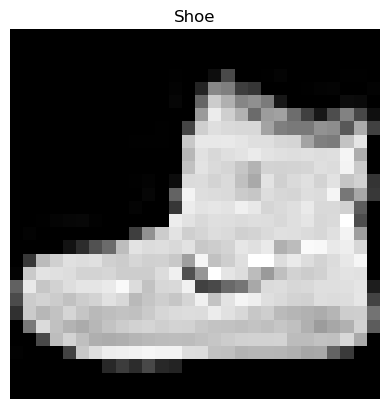

In [94]:
imshow(image, "Shoe")

In [103]:
class_names[torch.argmax(model_3(image.unsqueeze(0).to(device)))] # worked lol

'Ankle boot'

### 7.1 Stepping through `nn.Conv2d()`

See the documentation for `nn.Conv2d()` here - https://docs.pytorch.org/docs/stable/generated/torch.nn.Conv2d.html#torch.nn.Conv2d

In [65]:
torch.manual_seed(RANDOM_SEED)

# Create a batch of images
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image: tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.

In [68]:
# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=3, stride=1, padding=0)

# Pass the data through the convolutional layer
conv_output = conv_layer(test_image)
print(f"Conv output shape: {conv_output.shape}")

Conv output shape: torch.Size([10, 62, 62])


### 7.2 Stepping through `nn.MaxPool2d()`

https://docs.pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html#torch.nn.MaxPool2d

In [72]:
# Print out original image shape without unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(0).shape}")

# Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 31, 31])


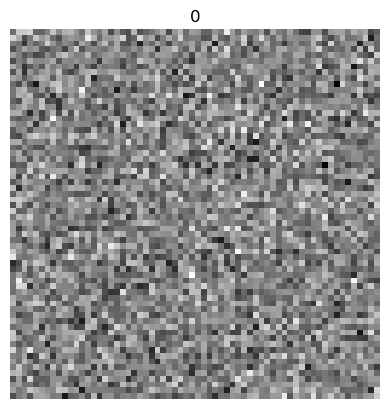

In [76]:
imshow(test_image[1].unsqueeze(0),0)

In [78]:
torch.manual_seed(42)

# Create a random tensor with a similar number of dimensions to our images
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"Random tensor:\n {random_tensor}")
print(f"Random tensor shape:\n {random_tensor.shape}")

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n {max_pool_tensor}")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")
random_tensor

Random tensor:
 tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape:
 torch.Size([1, 1, 2, 2])

Max pool tensor:
 tensor([[[[0.3367]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])

### 7.3 Setup a loss function and optimizer for `model_3`

In [110]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_3.parameters(), lr=0.001)
acc_fn = torchmetrics.Accuracy(task="multiclass", num_classes=len(class_names))
model_3, device

(FashionMNISTModelV3(
   (conv_block_1): Sequential(
     (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (1): ReLU()
     (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (3): ReLU()
     (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   )
   (conv_block_2): Sequential(
     (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (1): ReLU()
     (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (3): ReLU()
     (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (5): ReLU()
     (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   )
   (classifier): Sequential(
     (0): Flatten(start_dim=1, end_dim=-1)
     (1): Linear(in_features=3136, out_features=10, bias=True)
   )
 ),
 device(type='mps'))

### 7.4 Training and testing `model_3` using our training and testing functions

In [111]:
torch.manual_seed(RANDOM_SEED)
torch.mps.manual_seed(RANDOM_SEED)

# Measure time
from timeit import default_timer as timer
train_time_start_model_3 = timer()
EPOCHS = 20

for epoch in tqdm(range(EPOCHS)):
    print(f"Epoch {epoch + 1}/{EPOCHS}")
    training_step(
        model=model_3,
        dataloader=train_dataloader,
        loss_fn=loss_fn,
        optimizer=optimizer,
        acc_fn=acc_fn,
        device=device
    )
    test_step(
        model=model_3,
        dataloader=test_dataloader,
        loss_fn=loss_fn,
        acc_fn=acc_fn,
        device=device
    )

train_time_end_model_3 = timer()
total_train_time_model_3 = print_train_time(train_time_start_model_3, train_time_end_model_3, device)

Epoch 1/20
Train loss: 0.422144, Train accuracy: 84.64%
Test loss: 0.3035, test accuracy: 89.34%
Epoch 2/20
Train loss: 0.259428, Train accuracy: 90.79%
Test loss: 0.2581, test accuracy: 90.57%
Epoch 3/20
Train loss: 0.219161, Train accuracy: 92.12%
Test loss: 0.2299, test accuracy: 91.78%
Epoch 4/20
Train loss: 0.195240, Train accuracy: 92.86%
Test loss: 0.2276, test accuracy: 92.11%
Epoch 5/20
Train loss: 0.171654, Train accuracy: 93.68%
Test loss: 0.2427, test accuracy: 91.85%
Epoch 6/20
Train loss: 0.153972, Train accuracy: 94.38%
Test loss: 0.2276, test accuracy: 91.86%
Epoch 7/20
Train loss: 0.133356, Train accuracy: 95.18%
Test loss: 0.2243, test accuracy: 91.89%
Epoch 8/20
Train loss: 0.116114, Train accuracy: 95.74%
Test loss: 0.2435, test accuracy: 91.79%
Epoch 9/20
Train loss: 0.100863, Train accuracy: 96.29%
Test loss: 0.2568, test accuracy: 91.49%
Epoch 10/20
Train loss: 0.086991, Train accuracy: 96.82%
Test loss: 0.2911, test accuracy: 92.02%
Epoch 11/20
Train loss: 0.076

In [114]:
model_3_results = eval_model(
    model = model_3,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    acc_fn=acc_fn,
)

## 8. Compare model results and training time


In [120]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results, model_3_results])
compare_results.drop(columns=["model"])

,model_name,loss,accuracy
0,FashionMNISTModelV0,0.622241,0.782743
1,FashionMNISTModelV1,0.287759,0.918989
2,FashionMNISTModelV2,0.592305,0.786027
3,FashionMNISTModelV3,0.501652,0.915406


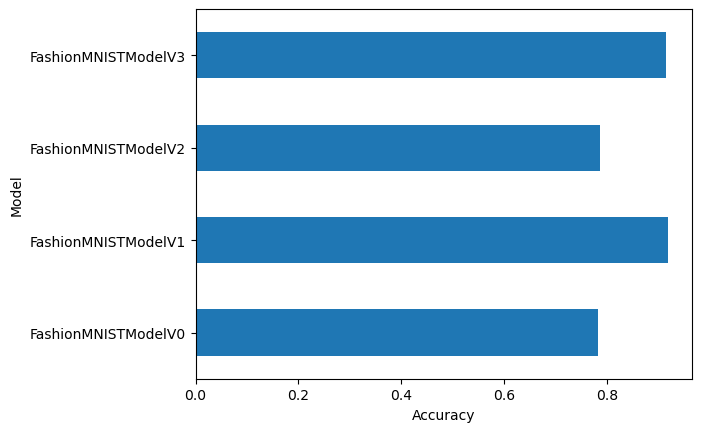

In [130]:
compare_results.set_index("model_name")["accuracy"].plot(kind="barh")
plt.xlabel("Accuracy")
plt.ylabel("Model");

## 9. Make and evaluate random predictions with the best modal

In [131]:
def make_predictions(model: nn.Module, data: list, device: torch.device):
    pred_probs =[]
    model.eval()

    with torch.inference_mode():
        for sample in data:
            # Prepare the sample (add a batch dimension and pass to target device)
            sample = torch.unsqueeze(sample, dim=0).to(device)

            # Forward pass (model outputs raw logits)
            pred_logits = model(sample)

            # prediction probability  (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logits.squeeze(), dim=0)

            # Get pred_prob off the GPU for further calculations
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into tensor
    return torch.stack(pred_probs)

In [154]:
import random
# random.seed(RANDOM_SEED)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

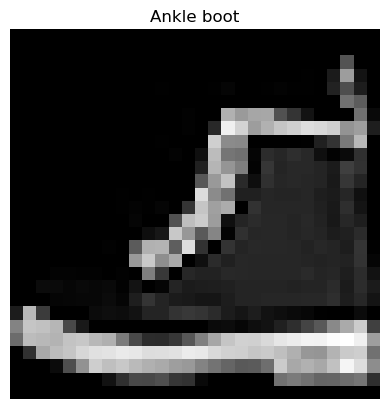

In [155]:
imshow(test_samples[0], class_names[test_labels[0]])

In [156]:
# Make predictions
pred_probs = make_predictions(model_3, test_samples, device)

# View first two probabilities
pred_probs[:2]

tensor([[3.5274e-14, 1.6876e-20, 4.7753e-15, 5.7628e-15, 6.3682e-20, 1.3166e-12,
         1.2100e-14, 3.5989e-06, 8.5755e-13, 1.0000e+00],
        [4.6781e-10, 3.0655e-17, 2.5489e-11, 1.2988e-11, 1.4222e-14, 2.9178e-12,
         3.6991e-10, 1.0000e+00, 1.3526e-09, 3.3929e-06]])

In [157]:
# Convert predictions probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([9, 7, 2, 0, 1, 0, 3, 5, 4])

In [158]:
test_labels

[9, 7, 2, 0, 1, 0, 4, 5, 4]

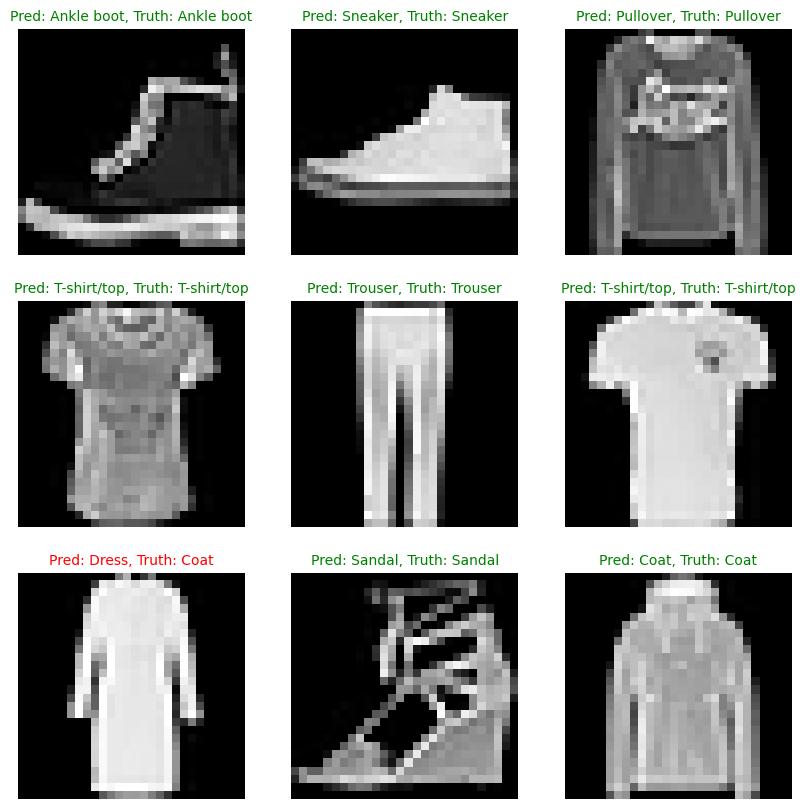

In [159]:
# Plot predictions
plt.figure(figsize=(10, 10))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
    plt.subplot(nrows, ncols, i + 1)

    # Plot the target image
    plt.imshow(sample.squeeze(), cmap="gray")


    # Find the predictions (in text form, e.g. "Sandel")
    pred_label = class_names[pred_classes[i]]

    # Get the truth label (in test form)
    truth_label = class_names[test_labels[i]]

    # Create a title for the plot
    title_text = f"Pred: {pred_label}, Truth: {truth_label}"

    # Check if equality between pred and truth and change the color of the title text
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, color="g")
    else:
        plt.title(title_text, fontsize=10, color="r")
    plt.axis("off")

## 10. Making a confusion matrix for further prediction evaluation

A confusion matrix is a fantastic way of evaluating your classification models visually:
https://www.learnpytorch.io/02_pytorch_classification/#9-more-classification-evaluation-metrics

1. Make predictions with our trained model on the test dataset
2. Make a confusion matrix torchmetrics.ConfusionMatrix -
https://torchmetrics.readthedocs.io/en/stable/classification/confusion_matrix.html
3. Plot the confusion matrix using mlxtend.plotting.plot_confusion_matrix() - http://rasbt.github.io/mlxtend/user_guide/plotting/plot._confusion_matrix/

In [166]:
# Import tqdm.auto
from tqdm import tqdm

# 1. make predictions with trained model
y_preds = []
model_1.eval()
with torch.inference_mode():
    for img, label in tqdm(test_dataloader, desc="Making predictions"):
        # Send the data and targets to target device
        img, label = img.to(device), label.to(device)
        # Do the forward pass
        y_logit = model_1(img)
        # Turn predictions from logits -> prediction probabilities -> prediction labels
        y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
        # Put predictions on CPU for evaluation
        y_preds.append(y_pred.cpu())

# Concatenate list of predictions into a tensor
y_preds_tensor = torch.cat(y_preds)
y_preds_tensor[:10]

Making predictions: 100%|██████████| 157/157 [00:01<00:00, 102.16it/s]


tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [167]:
len(y_preds_tensor)

10000

In [168]:
import mlxtend
print(mlxtend.__version__)

0.23.4


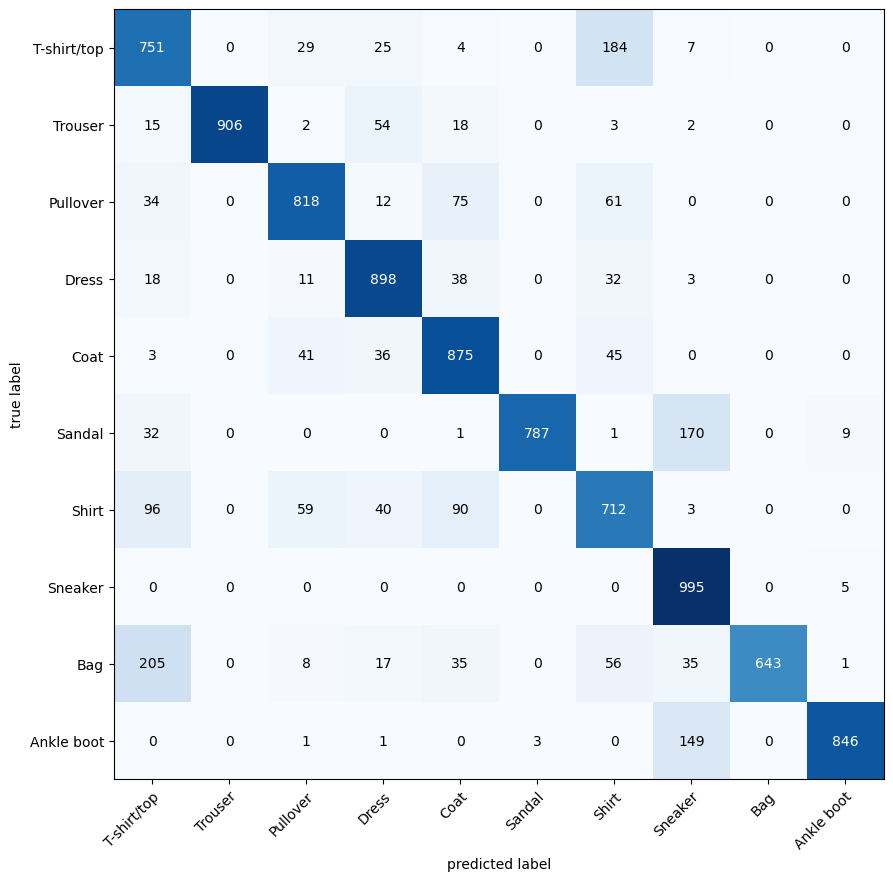

In [177]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
comfmat_tensor = confmat(y_preds_tensor, test_data.targets)

# 3. Plot our confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=comfmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10, 10),
    cmap="Blues",
)

## 11. Save and load best performing model

In [184]:
from pathlib import Path

# Create model directory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create model save
MODEL_NAME = "03_pytorch_computer_vision_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)
model_1.__class__.__name__

Saving model to: models/03_pytorch_computer_vision_model_1.pth


'FashionMNISTModelV1'

In [186]:
# Create a new instance
torch.manual_seed(RANDOM_SEED)

loaded_model_1 = FashionMNISTModelV1(in_features=28, hidden1=32, hidden2=64, out_features=len(class_names))

# Load in the saved state_dict()
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH, weights_only=True))

# Send the model to the target device
loaded_model_1.to(device)

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=3136, out_features=128, bias=True)
    (8): ReLU()
    (9): Linear(in_features=128, out_features=10, bias=True)
  )
)

In [192]:
# Evaluate loaded model
loaded_model_1_results = eval_model(model=loaded_model_1,
           data_loader=test_dataloader,
           loss_fn=loss_fn,
           acc_fn=acc_fn,
           device=device)
loaded_model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model': FashionMNISTModelV1(
   (layer_stack): Sequential(
     (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (1): ReLU()
     (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
     (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (4): ReLU()
     (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
     (6): Flatten(start_dim=1, end_dim=-1)
     (7): Linear(in_features=3136, out_features=128, bias=True)
     (8): ReLU()
     (9): Linear(in_features=128, out_features=10, bias=True)
   )
 ),
 'loss': 0.28775882630781,
 'accuracy': 0.9189888535031847}

In [193]:
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model': FashionMNISTModelV1(
   (layer_stack): Sequential(
     (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (1): ReLU()
     (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
     (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (4): ReLU()
     (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
     (6): Flatten(start_dim=1, end_dim=-1)
     (7): Linear(in_features=3136, out_features=128, bias=True)
     (8): ReLU()
     (9): Linear(in_features=128, out_features=10, bias=True)
   )
 ),
 'loss': 0.28775882630781,
 'accuracy': 0.9189888535031847}

In [195]:
# Check if model results are close to each other
torch.isclose(torch.tensor(model_1_results["loss"]), torch.tensor(loaded_model_1_results["loss"]))

tensor(True)